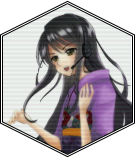

In [1]:
from IPython.display import Image, display
Image("ryoko.png", width="70")

# The Final Stage

*Dr. Ryoko is stuck in the quantum multiverse due to noise clusters interfering with her device. <br/>
Please DM Dr. Ryoko and ask her about the **noise clusters** and you will find out more. <br/>
Dr. Ryoko is trying to clear noise clusters with her laser beams, but has only 3 shots left.<br/>
To make matters worse, there seems to be one area (board) that cannot be cleared within 3 shots. <br/>
Help Dr. Ryoko identify that one area (board) with noise clusters that **cannot be cleared within 3 shots**. Good luck!<br/>*

[<< Click here to communicate with Dr. Ryoko through the web cam >>](https://youtu.be/Bkk5-j6rpoM)

*You can do this by learning how to solve a famous classic puzzle called “Asteroids puzzle”.*

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

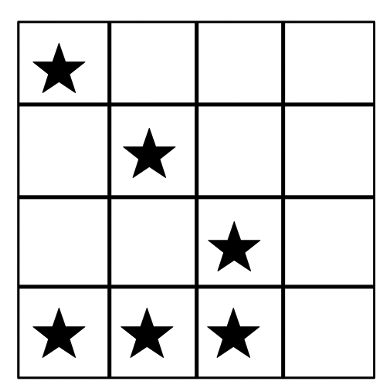

In [6]:
Image('asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

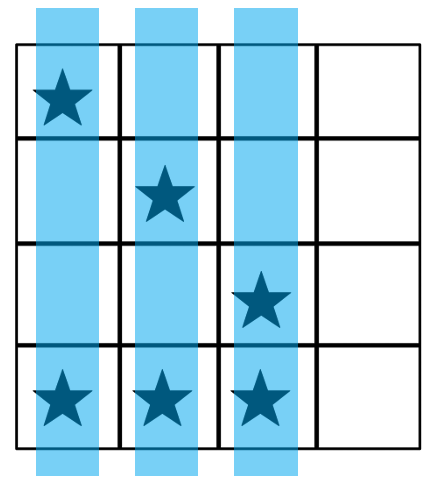

In [4]:
Image('asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

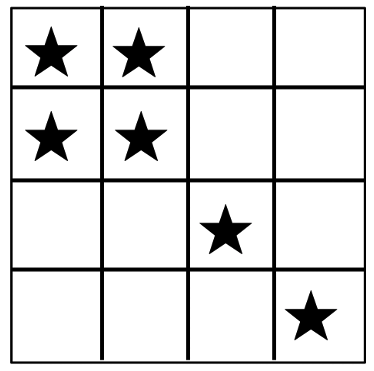

In [5]:
Image('false_asteroids_example.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


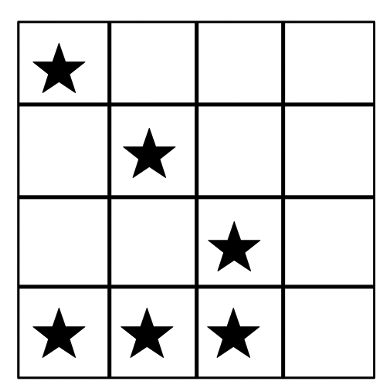

In [7]:
Image('asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

In [12]:
from itertools import permutations

perm = list(permutations(range(4)))
all_perm = {idx: arr for idx, arr in enumerate(perm)}

def similarity(arr1, arr2):
    sim = 0
    for idx in range(len(arr1)):
        if arr1[idx] == arr2[idx]:
            sim += 1
    return sim

def can_fit(idx_list, new):
    for idx in idx_list:
        if similarity(new, all_perm[idx]) >= 2:
            return False
    return True

def perm_groups():
    groups = [[0]]
    for idx, arr in all_perm.items():
        if idx == 0:
            continue
        for num, grp in enumerate(groups):
            if can_fit(grp, arr):
                grp.append(idx)
                break
            if num == len(groups)-1:
                groups.append([idx])
                break
    return groups

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

def init_state(qc, qreg, b, flip=1):
    if not (flip == 0 or flip == 1):
        raise ValueError('Flip must be either 0 or 1.')
        
    num_bits = qreg.size
    if type(b) is int:
        b = ('{:0' + str(num_bits) + 'b}').format(b)
    if len(b) > num_bits:
        raise ValueError('Number of bits more than expected.')
        
    for idx, bit in enumerate(b):
        if int(bit) == flip:
            qc.x(qreg[idx])
            
def diffusion(nq, use_anc=False):
    q = QuantumRegister(nq, name='q')
    if use_anc:
        anc = QuantumRegister(nq-2, name='anc')
        qc = QuantumCircuit(q, anc, name='diffusion')
    else:
        qc = QuantumCircuit(q, name='diffusion')
    
    qc.h(q)
    qc.x(q)
    qc.h(q[-1])
    if use_anc:
        qc.mct(q[:-1], q[-1], ancilla_qubits=anc, mode='v-chain')
    else:
        qc.mct(q[:-1], q[-1])
    qc.h(q[-1])
    qc.x(q)
    qc.h(q)
    
    return qc

def diffusion_4bit():
    q = QuantumRegister(4, name='q')
    qc = QuantumCircuit(q, name='diffusion')
    
    qc.h(q)
    qc.x(q)
    qc.h(q[-1])
    qc.rcccx(*q)
    qc.h(q[-1])
    qc.x(q)
    qc.h(q)
    
    return qc

def qram(problem_set):
    MCT_MODE = 'v-chain'
    
    addr = QuantumRegister(4, name='addr')
    addr_anc = QuantumRegister(1, name='addr_anc')
    board = QuantumRegister(16, name='board')
    mct_anc = QuantumRegister(2, name='mct_anc')
    qc = QuantumCircuit(addr, addr_anc, board, mct_anc, name='qram')
    
    for idx, bd in enumerate(problem_set):
        init_state(qc, addr, idx, flip=0)
        qc.mct(addr, addr_anc, ancilla_qubits=mct_anc, mode=MCT_MODE)
        for r, c in bd:
            r, c = int(r), int(c)
            qc.cx(addr_anc, board[4*r+c])
        qc.mct(addr, addr_anc, ancilla_qubits=mct_anc, mode=MCT_MODE)
        init_state(qc, addr, idx, flip=0)
        qc.barrier()
    
    return qc

def oracle():
    groups = perm_groups()
    
    board = QuantumRegister(16, name='board')
    mct_anc = QuantumRegister(2, name='mct_anc')
    out = QuantumRegister(2, name='out')
    qc = QuantumCircuit(board, mct_anc, out, name='oracle')
    
    for idx, perm in enumerate(permutations(range(4))):
        a, b, c, d = perm
        a = 4*a
        b = 4*b + 1
        c = 4*c + 2
        d = 4*d + 3
        if idx in groups[0]:
            qc.mct([board[a], board[b], board[c], board[d]], out[0], ancilla_qubits=mct_anc, mode='v-chain')
        else:
            qc.mct([board[a], board[b], board[c], board[d]], out[1], ancilla_qubits=mct_anc, mode='v-chain')

    return qc

In [11]:
div_group()

[[0, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23],
 [1, 2, 5, 6, 9, 10, 13, 14, 17, 18, 21, 22]]

In [86]:
{idx: all_perm[idx] for idx in groups[0]}

{0: (0, 1, 2, 3),
 3: (0, 2, 3, 1),
 4: (0, 3, 1, 2),
 7: (1, 0, 3, 2),
 8: (1, 2, 0, 3),
 11: (1, 3, 2, 0),
 12: (2, 0, 1, 3),
 15: (2, 1, 3, 0),
 16: (2, 3, 0, 1),
 19: (3, 0, 2, 1),
 20: (3, 1, 0, 2),
 23: (3, 2, 1, 0)}

In [17]:
for a, b, c, d in permutations(range(4)):
        a = 4*a
        b = 4*b + 1
        c = 4*c + 2
        d = 4*d + 3
        print((a, b, c, d))

(0, 5, 10, 15)
(0, 5, 14, 11)
(0, 9, 6, 15)
(0, 9, 14, 7)
(0, 13, 6, 11)
(0, 13, 10, 7)
(4, 1, 10, 15)
(4, 1, 14, 11)
(4, 9, 2, 15)
(4, 9, 14, 3)
(4, 13, 2, 11)
(4, 13, 10, 3)
(8, 1, 6, 15)
(8, 1, 14, 7)
(8, 5, 2, 15)
(8, 5, 14, 3)
(8, 13, 2, 7)
(8, 13, 6, 3)
(12, 1, 6, 11)
(12, 1, 10, 7)
(12, 5, 2, 11)
(12, 5, 10, 3)
(12, 9, 2, 7)
(12, 9, 6, 3)


In [101]:
# sample problems and answers for week-3
# problem_name = [[input], 'answer']
q1 = [[[['0', '1'], ['0', '2'], ['1', '0'], ['2', '0'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['0', '3'], ['2', '1'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '1'], ['0', '2'], ['1', '1'], ['2', '0'], ['3', '2']],
 [['0', '1'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '0'], ['3', '1']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['2', '0'], ['2', '1'], ['3', '0']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
 [['0', '2'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '3'], ['3', '2']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '2'], ['1', '0'], ['2', '2'], ['2', '3'], ['3', '3']],
 [['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['1', '0'], ['2', '1'], ['2', '2'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['1', '1'], ['1', '2'], ['2', '1'], ['2', '3'], ['3', '0']],
 [['0', '1'], ['0', '3'], ['2', '1'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['1', '3'], ['3', '0'], ['3', '1']]], '6']

q2 = [[[['0', '0'], ['0', '2'], ['1', '0'], ['1', '1'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['1', '0'], ['2', '1'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '1'], ['1', '2'], ['3', '0'], ['3', '2']],
 [['0', '2'], ['0', '3'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
 [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '2'], ['3', '1']],
 [['0', '0'], ['1', '0'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '3']],
 [['0', '0'], ['0', '1'], ['1', '2'], ['2', '0'], ['3', '1'], ['3', '2']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2']],
 [['0', '0'], ['0', '1'], ['0', '3'], ['1', '0'], ['2', '1'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '0'], ['2', '2']],
 [['0', '1'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['1', '1'], ['2', '0'], ['2', '3'], ['3', '1'], ['3', '2']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['3', '1'], ['3', '3']],
 [['0', '2'], ['0', '3'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '2']]], '13']

q3 = [[[['0', '2'], ['0', '3'], ['1', '1'], ['2', '0'], ['3', '0'], ['3', '1']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '2'], ['3', '0'], ['3', '1']],
 [['0', '0'], ['0', '3'], ['1', '1'], ['1', '3'], ['2', '2'], ['2', '3']],
 [['0', '2'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '3'], ['3', '1']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['2', '0'], ['2', '3'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '2'], ['3', '3']],
 [['0', '1'], ['0', '3'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['1', '0'], ['1', '1'], ['2', '1'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '3'], ['2', '0'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '1'], ['2', '0'], ['2', '3'], ['3', '2'], ['3', '3']],
 [['0', '3'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
 [['0', '0'], ['0', '3'], ['1', '0'], ['1', '1'], ['2', '0'], ['2', '2']],
 [['0', '1'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '2']],
 [['0', '2'], ['0', '3'], ['1', '3'], ['2', '0'], ['2', '2'], ['3', '0']]], '3']


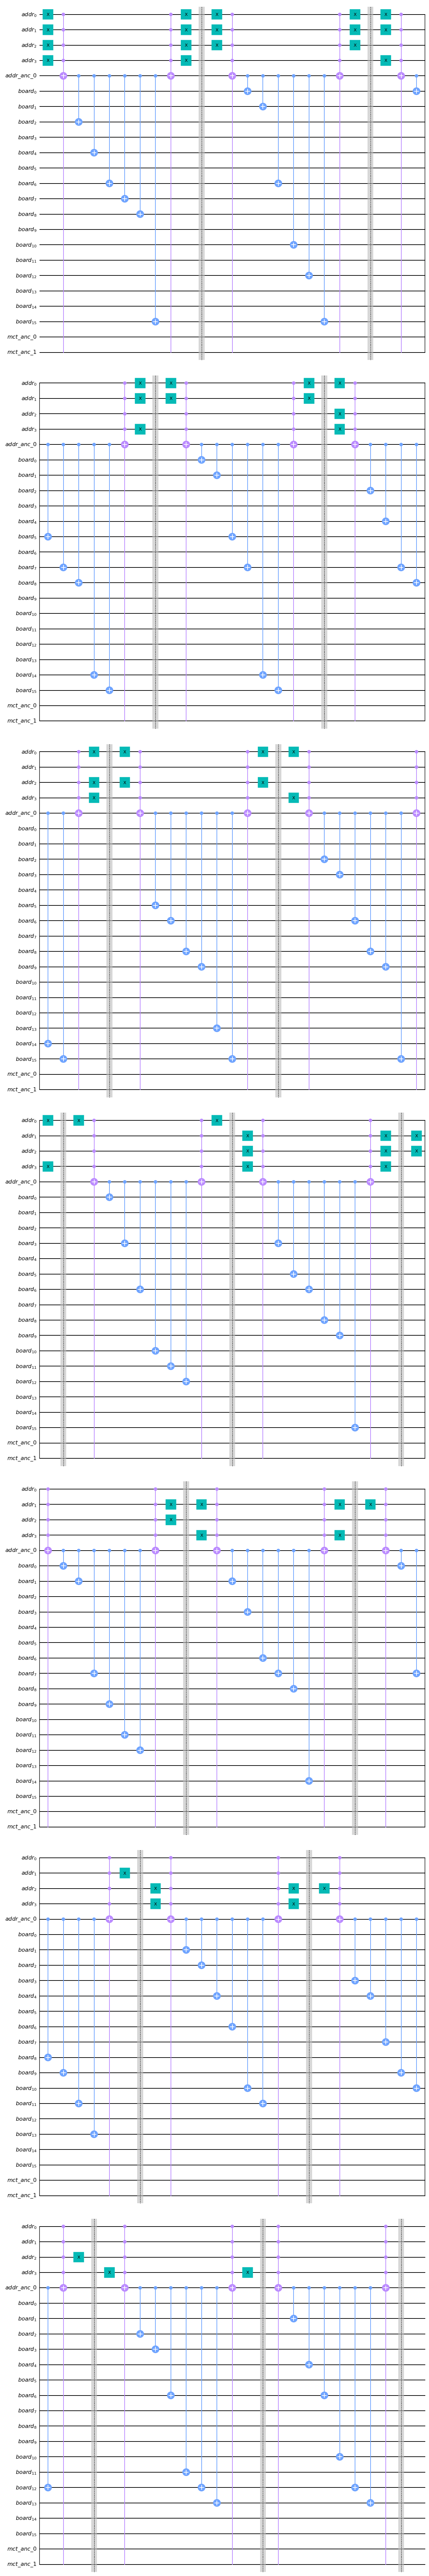

In [115]:
qram(problem_set).draw()

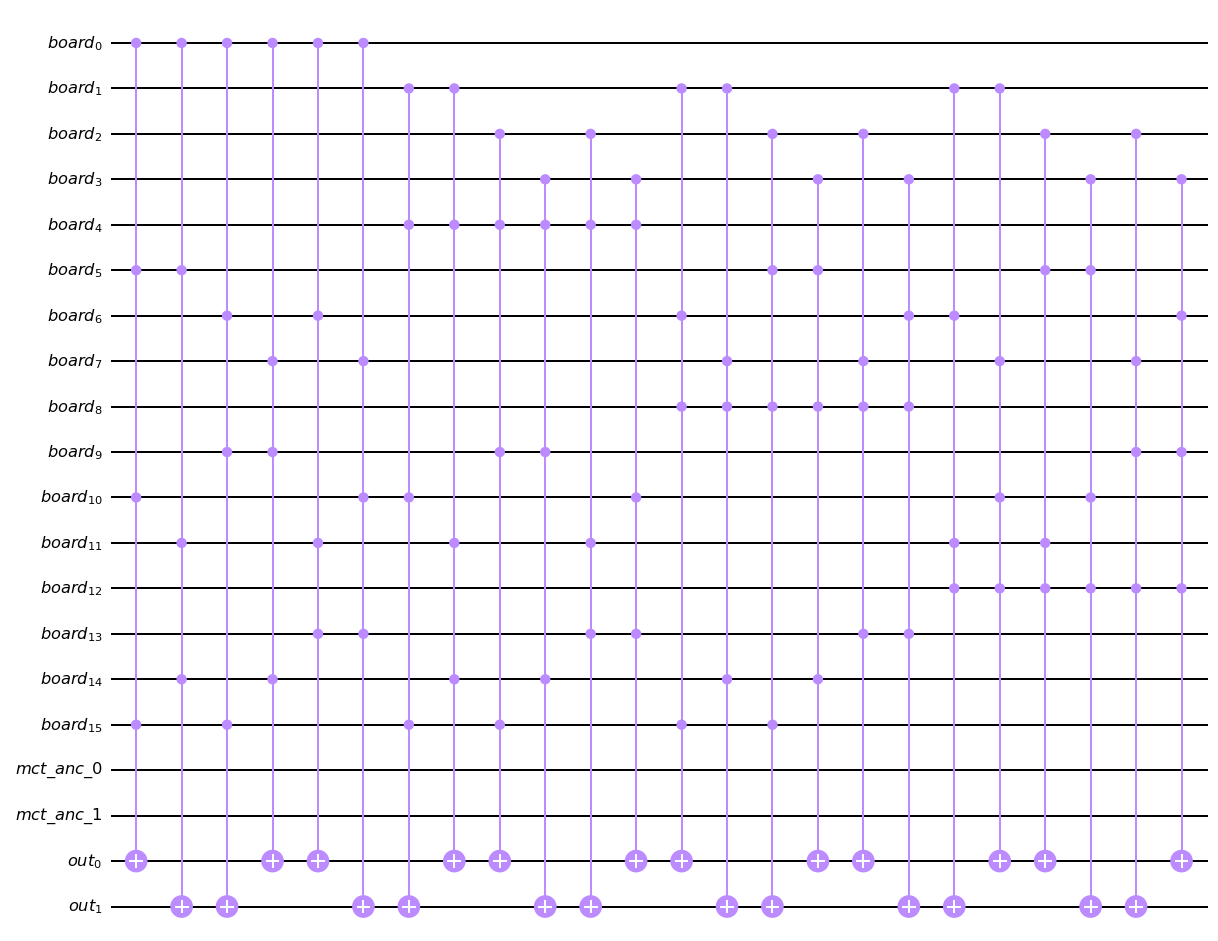

In [15]:
oracle().draw()

Answer by creating a quantum circuit to solve the puzzle shown with the problem set above. In the quantum circuit to be submitted, measure **only the `solution` (4bit)** that solves the puzzle. <br/>
To submit your solution, create a function that takes `problem_set` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "problem_set". We will validate your circuit with different inputs.<br/>
Make a circuit that gets the correct answer at a low cost. The lower the cost, the better.

## <span style="color: red; ">IMPORTANT: Final exercise submission rules</span>

**For solving this problem:**<br/>
- **Please implement the quantum circuit within <span style="color: red; ">28 qubits.</span>**<br/>
- Use **Grover's algorithm** you learned in Week1 & 2 with **<span style="color: red; ">iteration ＝ 1.</span>**
- The initial state for Grover's algorithm must be equal probability distributions. For example, if you want use only 3 computational bases for 2 qubits instead of 4 as the initial state. Then, the state will be $\sqrt\frac{1}{3} (|00\rangle + |01\rangle + |11\rangle)$

- Please note that you can get the answer with the same endian as the one used in Week2 explanation. You should map the index of the problem into four classical registers *`c[0:4]`* in binary. `c[0]` is the highest bit and `c[3]` is the lowest bit. For example, when mapping 12, the furthest left bit of the `1100` will be mapped to `c[0]`.
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simplifications in this competition.
- Please **do not run jobs in succession** even if you are concerned that your job is not running properly. This can create a long queue and clog the backend. You can check whether your job is running properly at:<br/>
https://quantum-computing.ibm.com/results  
- Your score for this exercise will be same as the cost of your QuantumCircuit. The lower the cost, the better.
- Judges will check top 10 solutions manually to see if their solutions adhere to the rules. **Please note that your ranking is subject to change after the challenge period as a result of the judging process.**
- Top 10 participants will be recognized and asked to submit a write up on how they solved the exercise.

In [16]:
def week3_ans_func(problem_set):
    ##### build your quantum circuit here
    ##### In addition, please make it a function that can solve the problem even with different inputs (problem_set). We do validation with different inputs. 
    
    #### Code for Grover's algorithm with iterations = 1 will be as follows. 
    #### for i in range(1):
    ####   oracle()
    ####   diffusion()
    MCT_MODE = 'v-chain'
    
    addr = QuantumRegister(4, name='addr')
    addr_anc = QuantumRegister(1, name='addr_anc')
    board = QuantumRegister(16, name='board')
    mct_anc = QuantumRegister(2, name='mct_anc')
    oracle_out = QuantumRegister(2, name='oracle_out')
    phase = QuantumRegister(1, name='phase')
    c = ClassicalRegister(len(addr), name='c')

    regs = [addr, addr_anc, board, mct_anc, oracle_out, phase, c]
    qc = QuantumCircuit(*regs)
    
    # init
    qc.h(addr)
    qc.x(phase)
    qc.h(phase)
    
    ##
    qc.append(qram(problem_set), [*addr, *addr_anc, *board, *mct_anc])
    qc.append(oracle(), [*board, *mct_anc, *oracle_out])
    
    qc.x(oracle_out)
    qc.ccx(oracle_out[0], oracle_out[1], phase)
    qc.x(oracle_out)
    
    qc.append(oracle().inverse(), [*board, *mct_anc, *oracle_out])
    qc.append(qram(problem_set).inverse(), [*addr, *addr_anc, *board, *mct_anc])
    qc.append(diffusion_4bit(), addr)
    
    qc.measure(addr, c)
    
    return qc

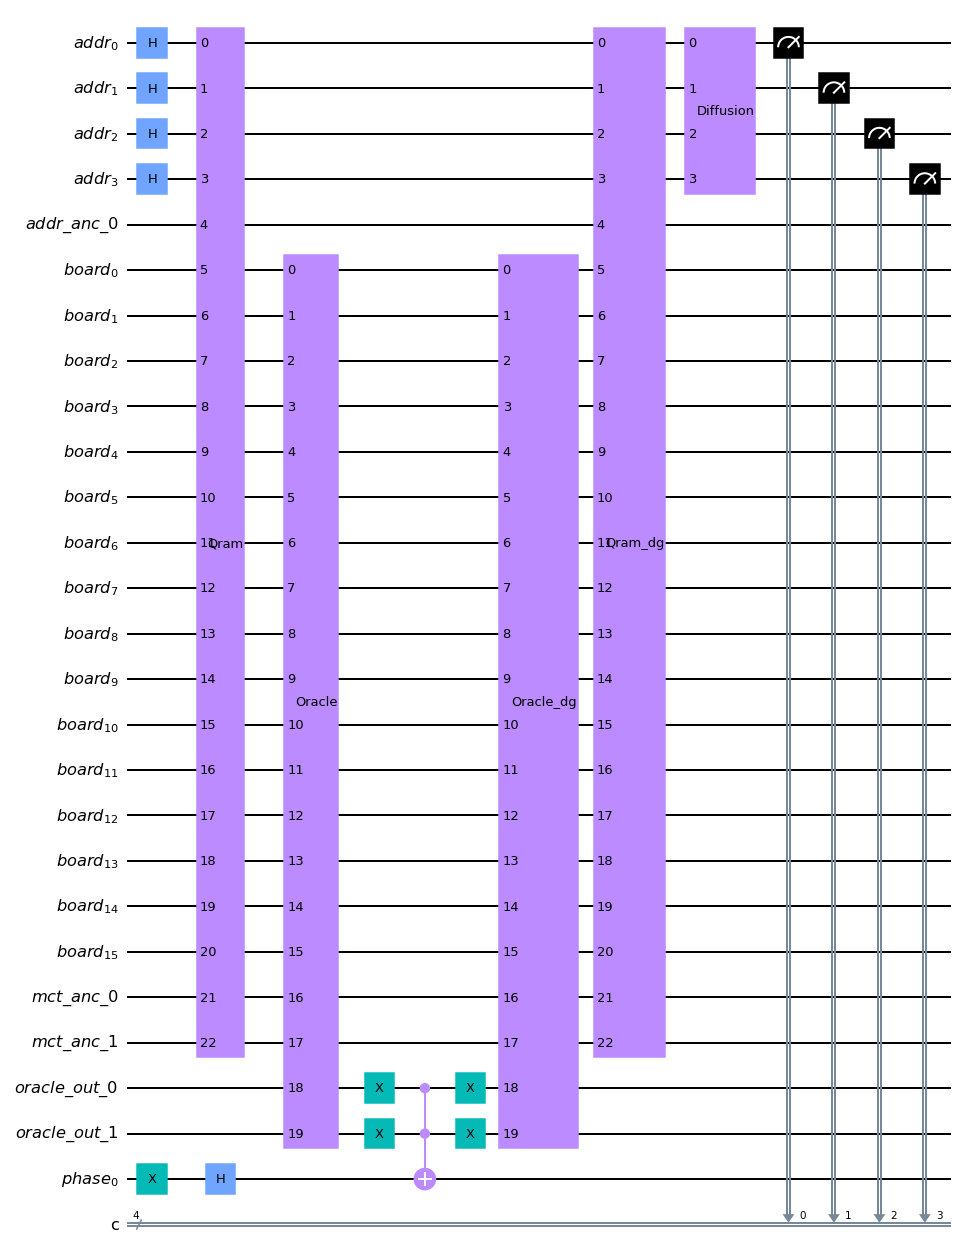

In [18]:
qc = week3_ans_func(problem_set)
qc.draw()

In [15]:
# Submission code
from qc_grader import grade_ex3, prepare_ex3, submit_ex3

# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_func)

result = job.result()
counts = result.get_counts()
original_problem_set_counts = counts[0]

original_problem_set_counts
# The bit string with the highest number of observations is treated as the solution.

Running week3_ans_func...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fc41b94758a9f0019c42a01) status and proceed to grading when it successfully completes.


{'0000': 63,
 '0001': 63,
 '0010': 72,
 '0011': 57,
 '0100': 17,
 '0101': 408,
 '0110': 22,
 '0111': 12,
 '1000': 36,
 '1001': 27,
 '1010': 44,
 '1011': 40,
 '1100': 42,
 '1101': 25,
 '1110': 32,
 '1111': 40}

In [12]:
from qiskit import IBMQ, execute
from qiskit.tools.monitor import job_monitor

# qc = week3_ans_func(problem_set)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend, seed_simulator=12345, shots=8192)
job_monitor(job)

counts = job.result().get_counts()
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Job Status: job has successfully run


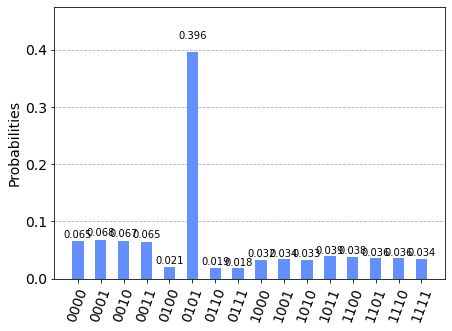

In [13]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [20]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.cccx(*q)

In [21]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

pass_ = Unroller(['u3', 'cx'])
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
ops = new_circuit.count_ops()
print(ops)
print('Cost:', ops['u3'] + 10*ops['cx'])

OrderedDict([('u3', 12), ('cx', 6)])
Cost: 72


In [16]:
# Check your answer by executing following code.
# The quantum cost of the QuantumCircuit is obtained as the score. The lower the cost, the better.
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 26073.
The lower your score the better!
Feel free to submit your answer.


In [112]:
# Submit your results by executing following code. You can submit as many times as you like during the period. 
submit_ex3(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
Congratulations! You have rescued Dr. Ryoko from the quantum realm. The bright "quantum future" is ahead.


In [4]:
import qiskit.tools.jupyter
%qiskit_version_table